# PCA理论介绍

PCA是一种数据降维技术，将高维空间的数据映射到低维空间。**目标1:降低维度之间的相关性；目标2:自身维度的方差尽可能的大** 

如何做$\rightarrow$第一个新坐标轴选择的是原始数据方差最大的方向，第二个坐标轴是与第一个坐标轴正交且具有最大方差的方向,依此类推,大部分的方差就集中在前面几个方向中，因此可以忽略后面的方向，达到降维的效果。


**协方差矩阵**: 假设数据为三维，则协方差矩阵为: 

\begin{align}
C= \big(
&cov(x,x)\ \  cov(x,y) \ \ cov(x,z) \\
&cov(y,x)\ \  cov(y,y)\ \  cov(y,z)\\
&cov(z,x)\ \  cov(z,y)\ \ cov(z,z)
\big)
\end{align}
PCA与协方差矩阵的关系: 协方差矩阵对角线元素代表了**自身维度的方差**，非对线元素代表了**维度之间的相关性**

两个目标的实现:**协方差矩阵对角化**

* 对角化的协方差矩阵中非对角线元素化为零，达到降低维度之间相关性 。(目标1)
* 对角化后，得到的特征值和特征向量代表了矩阵能在“特征向量”方向上发生“特征值”这么大的变化效果，特征值越大，表示其在特征向量上的变化越大，取最大的几个特征值，把这几个特征值对应的特征向量作为新的维度，达到自身维度方差大，并且降维效果。(目标2)

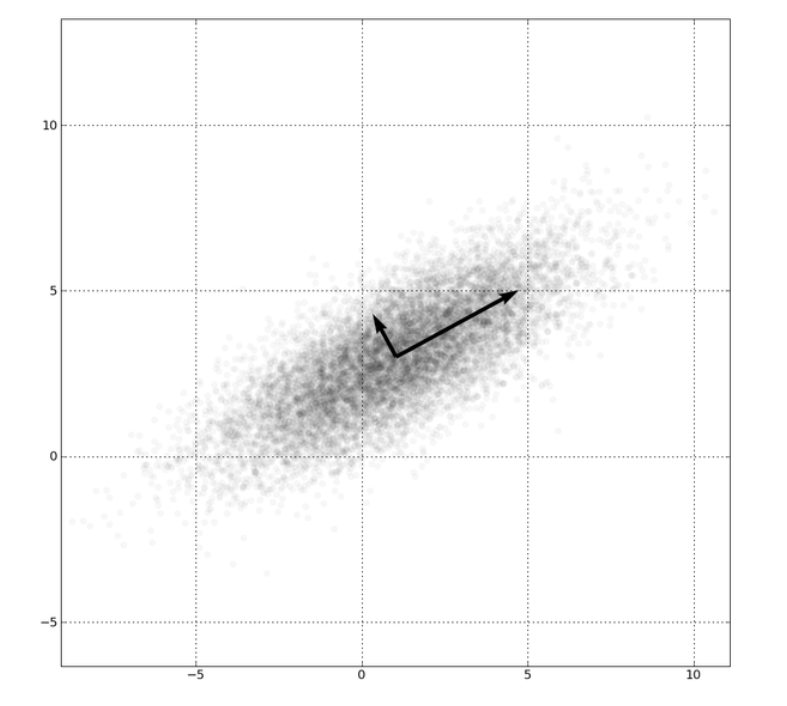

In [1]:
from IPython.display import Image
Image(filename = "主成分.png",width = 400)

# 伪代码

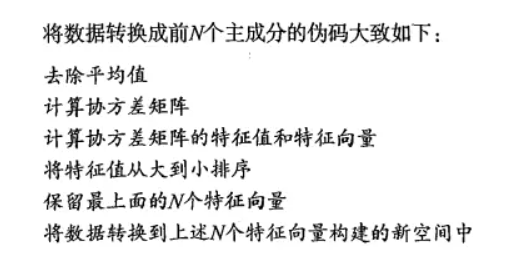

In [2]:
Image(filename = "伪代码.png")

# 代码实现

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

def pca(dataMat, k):
    average = np.mean(dataMat, axis=0)
    # 每一列特征减去该列均值
    meanRemoved = dataMat - average
    covMat = np.cov(meanRemoved, rowvar=False)
    featValue, featVec = np.linalg.eig(covMat)
    index = np.argsort(featValue)
    # 从排序后的矩阵最后一个开始自下而上选取最大的N个特征值，返回其对应的索引
    index = index[: -(k+1): -1]
    selectVec = featVec[:, index]
    low = np.dot(meanRemoved,selectVec)
    recon = np.dot(low,selectVec.T) + average
    return low, recon

# 可视化

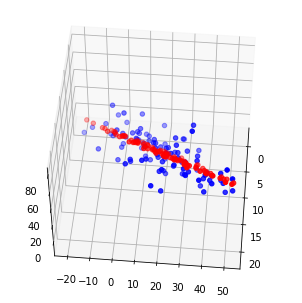

In [4]:
# 三维to二维
np.random.seed(2)
x = np.linspace(0,20,num = 100).reshape(-1,1)
y = 2 * x + 10 * np.random.randn(100).reshape(-1,1)
z = 3 * x + 10 * np.random.randn(100).reshape(-1,1)
arr1 = np.concatenate((x,y,z),axis=1)
low,recon = pca(arr1,2)

fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(arr1[:,0],arr1[:,1],arr1[:,2],color="blue")
ax.scatter(recon[:,0],recon[:,1],recon[:,2],color="red")
ax.view_init(elev=50,    # 仰角
             azim=5)   # 方位角
plt.show()

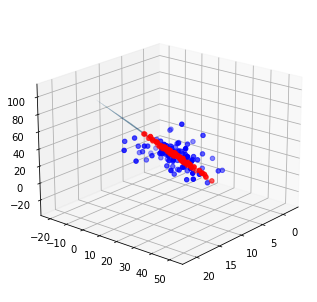

In [5]:
#曲线救国
a = recon[0][:2].reshape(1,2)
b = recon[1][:2].reshape(1,2)
c = recon[3][:2].reshape(1,2)
d = np.array([1,1,1]).reshape(3,1)
m = np.concatenate((np.concatenate((a,b,c),axis =0),d),axis = 1)
n = np.array([recon[0][2],recon[1][2],recon[3][2]])
x_y_weights = np.linalg.solve(m,n)
x = np.arange(0 ,20,0.1)
y = np.arange(0 ,20,0.1)
xx,yy = np.meshgrid(x,y)
zz = xx * x_y_weights[0] + yy *  x_y_weights[1] +  x_y_weights[2]

fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(arr1[:,0],arr1[:,1],arr1[:,2],color="blue")
ax.scatter(recon[:,0],recon[:,1],recon[:,2],color="red")
ax.plot_surface(xx,yy,zz,alpha = 0.5)
ax.view_init(elev=20 ,  # 仰角 15
             azim=40)  # 方位角 10
plt.show()

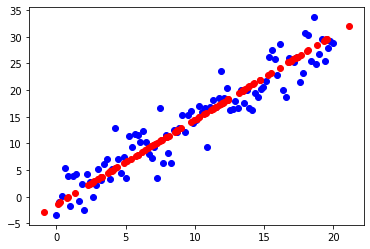

In [6]:
# 二维to一维
# arr2 = np.random.randint(0,50,size = (100,2))
x = np.linspace(0,20,num = 100).reshape(-1,1)
y = 1.5 * x + 3 * np.random.randn(100).reshape(-1,1)
arr2 = np.concatenate((x,y),axis=1)
low,recon = pca(arr2,1)
plt.scatter(arr2[:,0],arr2[:,1],c="blue")
plt.scatter(recon[:,0],recon[:,1],c="red")
plt.show()